In [2]:
import geopandas,pandas

D:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\geopandas\_compat.py:88: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.8.1-CAPI-1.13.3). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [3]:
import shapely.geometry as geom

In [4]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['font.sans-serif']=['Songti SC']
mpl.rcParams['axes.unicode_minus'] = False 

In [5]:
bj = geopandas.read_file("./data/beijing/行政区划.shp")

In [6]:
bj

,NAME,Shape_Leng,Shape_Area,面积,geometry
0,昌平区,2.078148,0.141333,1336.1000,"POLYGON Z ((116.32244 40.38358 0.00000, 116.33..."
1,朝阳区,1.418457,0.049293,467.7140,"MULTIPOLYGON Z (((116.48084 40.07908 0.00000, ..."
2,大兴区,2.233111,0.105408,1004.4800,"POLYGON Z ((116.43726 39.81707 0.00000, 116.43..."
3,东城区,0.454513,0.004414,41.9047,"POLYGON Z ((116.40311 39.97191 0.00000, 116.40..."
4,房山区,2.470704,0.203341,1936.1600,"POLYGON Z ((115.76348 39.92405 0.00000, 115.76..."
5,丰台区,1.402951,0.031600,300.3640,"POLYGON Z ((116.24717 39.89550 0.00000, 116.26..."
6,怀柔区,3.499465,0.213806,2009.1700,"POLYGON Z ((116.66525 41.04418 0.00000, 116.67..."
7,门头沟区,2.293522,0.146056,1385.3800,"POLYGON Z ((115.78883 40.16542 0.00000, 115.79..."
8,密云县,2.664916,0.216130,2034.0600,"POLYGON Z ((116.86994 40.79687 0.00000, 116.86..."
9,平谷区,1.477878,0.089950,850.3080,"POLYGON Z ((117.34580 40.16933 0.00000, 117.34..."


In [7]:
poly = geom.Polygon([(116.31,39.85),(116.45,39.85),(116.45,40),(116.31,40)])

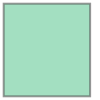

In [8]:
poly

In [19]:
polyPD = geopandas.GeoDataFrame(pandas.DataFrame({"geometry":[poly]}).set_geometry("geometry"))

In [9]:
it = bj[bj.geometry.intersects(poly)]
it

,NAME,Shape_Leng,Shape_Area,面积,geometry
1,朝阳区,1.418457,0.049293,467.7140,"MULTIPOLYGON Z (((116.48084 40.07908 0.00000, ..."
3,东城区,0.454513,0.004414,41.9047,"POLYGON Z ((116.40311 39.97191 0.00000, 116.40..."
5,丰台区,1.402951,0.031600,300.3640,"POLYGON Z ((116.24717 39.89550 0.00000, 116.26..."
13,西城区,0.450128,0.005234,49.6903,"POLYGON Z ((116.38200 39.96710 0.00000, 116.38..."
15,海淀区,1.259671,0.045410,430.4560,"POLYGON Z ((116.23744 40.12590 0.00000, 116.23..."


<AxesSubplot:>

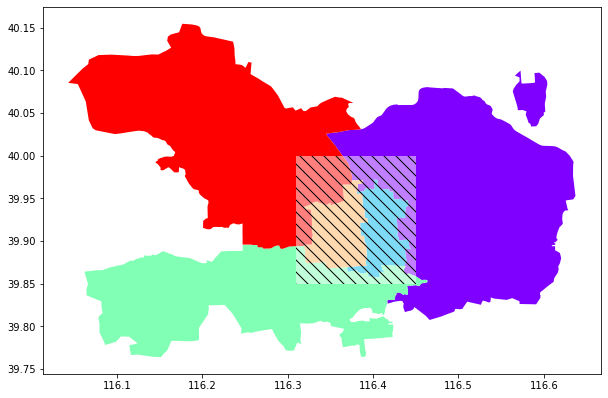

In [20]:
fig,ax = plt.subplots(figsize=(10,10))
it.plot(ax=ax,cmap="rainbow")
polyPD.plot(ax=ax,facecolor="white",hatch="\\\\",alpha=0.5)

<AxesSubplot:>

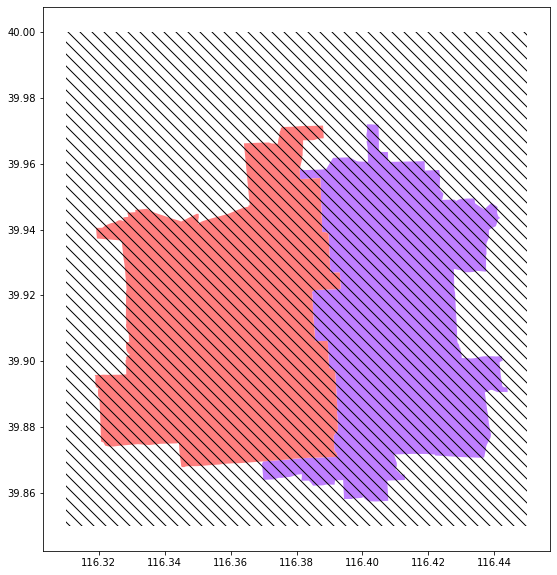

In [21]:
fig,ax = plt.subplots(figsize=(10,10))
bj[bj.geometry.within(poly)].plot(ax=ax,cmap="rainbow")
polyPD.plot(ax=ax,facecolor="white",hatch="\\\\",alpha=0.5)

<AxesSubplot:>

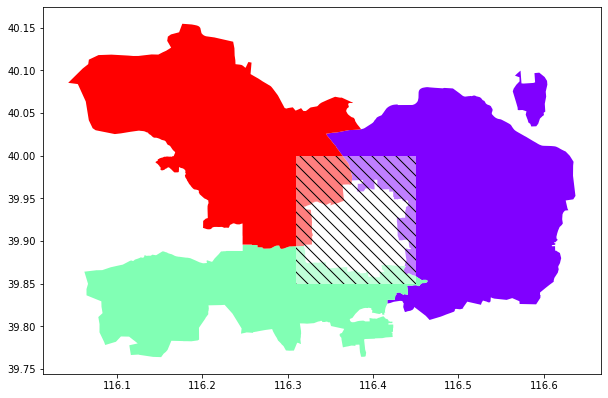

In [22]:
fig,ax = plt.subplots(figsize=(10,10))
bj[bj.geometry.overlaps(poly)].plot(ax=ax,cmap="rainbow")
polyPD.plot(ax=ax,facecolor="white",hatch="\\\\",alpha=0.5)

<AxesSubplot:>

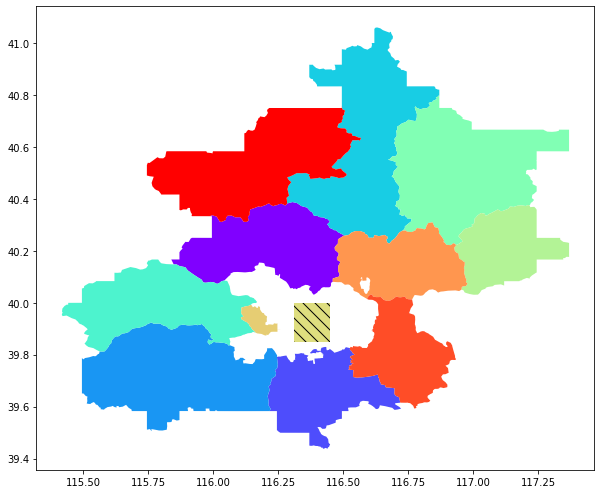

In [31]:
fig,ax = plt.subplots(figsize=(10,10))
bj[bj.geometry.disjoint(poly)].plot(ax=ax,cmap="rainbow")
polyPD.plot(ax=ax,facecolor="y",hatch="\\\\",alpha=0.5)